In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
ab.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [5]:
ab.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
ab.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
X=ab[['GRE Score','TOEFL Score']]
y=ab[['CGPA']]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=101)
X_train.head()

,GRE Score,TOEFL Score
188,331,115
496,337,117
256,309,99
442,331,116
247,311,104


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
abd=LinearRegression()

In [11]:
abd.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(abd.intercept_)

[-4.34370551]


In [13]:
predictions=abd.predict(X_test)

In [14]:
abd.coef_

array([[0.03030052, 0.03122941]])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


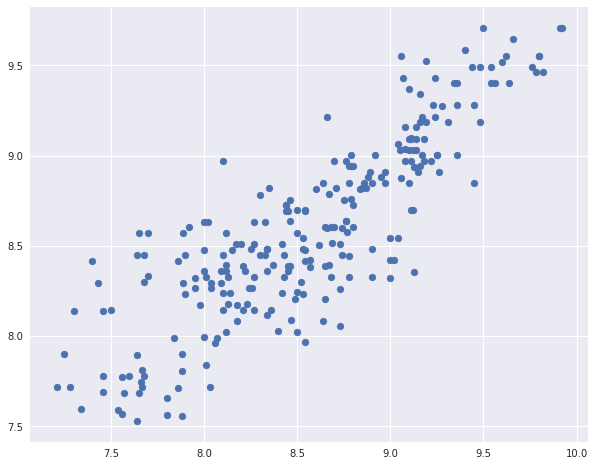

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/srv/conda/envs/notebook/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


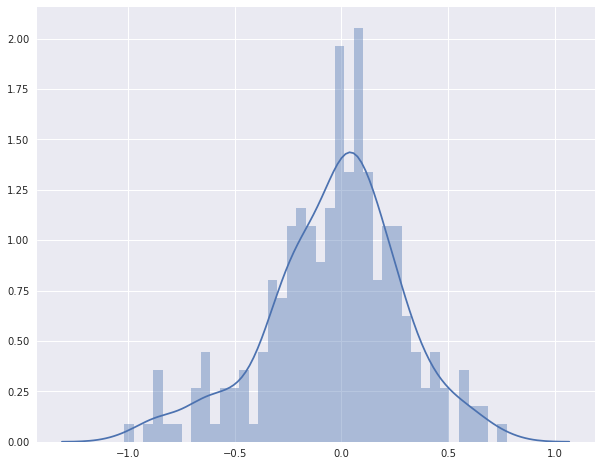

In [16]:
plt.figure(figsize=(10,8))
sns.distplot((y_test-predictions),bins=40)

In [17]:
from sklearn import metrics

In [18]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.23923514596525347
MSE: 0.10075710252002508
RMSE: 0.3174225929577557


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


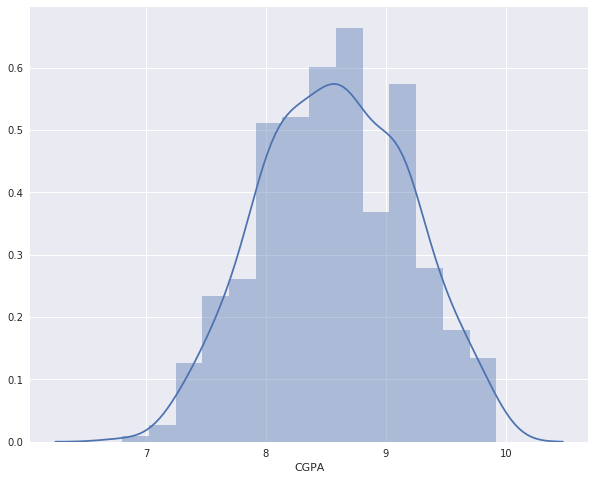

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(ab['CGPA'])

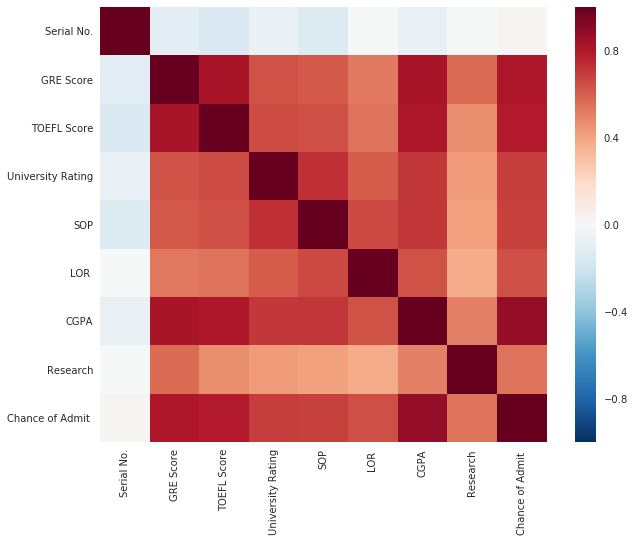

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(ab.corr())

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


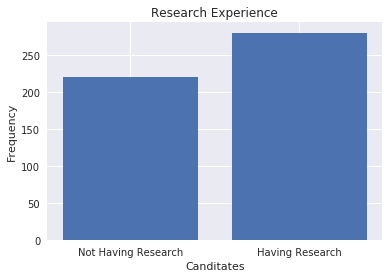

In [21]:
y = np.array([len(ab[ab.Research == 0]),len(ab[ab.Research == 1])])
X = ["Not Having Research","Having Research"]
plt.bar(X,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

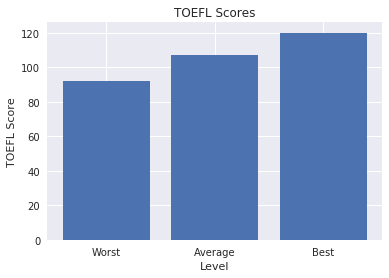

In [22]:
y = np.array([ab["TOEFL Score"].min(),ab["TOEFL Score"].mean(),ab["TOEFL Score"].max()])
X = ["Worst","Average","Best"]
plt.bar(X,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

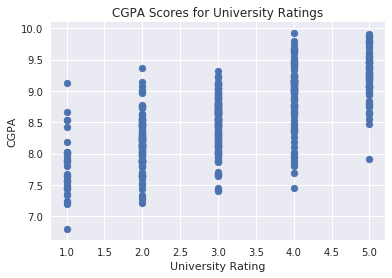

In [23]:
plt.scatter(ab["University Rating"],ab.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

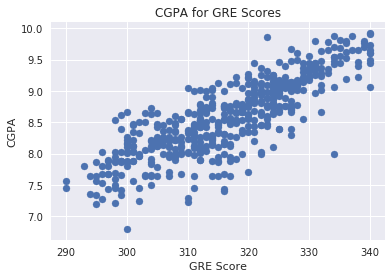

In [24]:
plt.scatter(ab["GRE Score"],ab.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

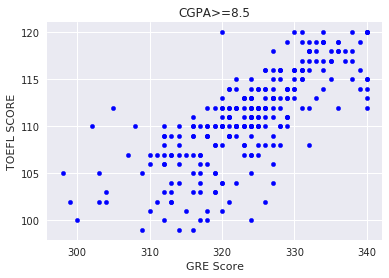

In [25]:
ab[ab.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="blue")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

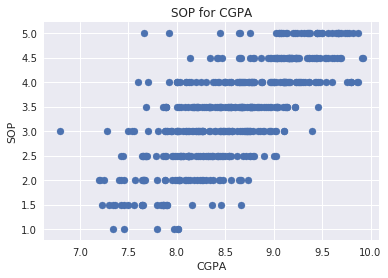

In [26]:
plt.scatter(ab["CGPA"],ab.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

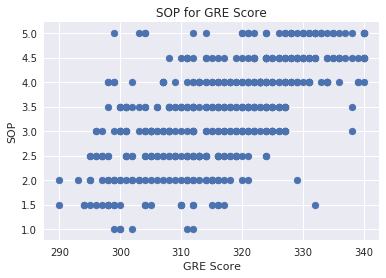

In [27]:
plt.scatter(ab["GRE Score"],ab["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

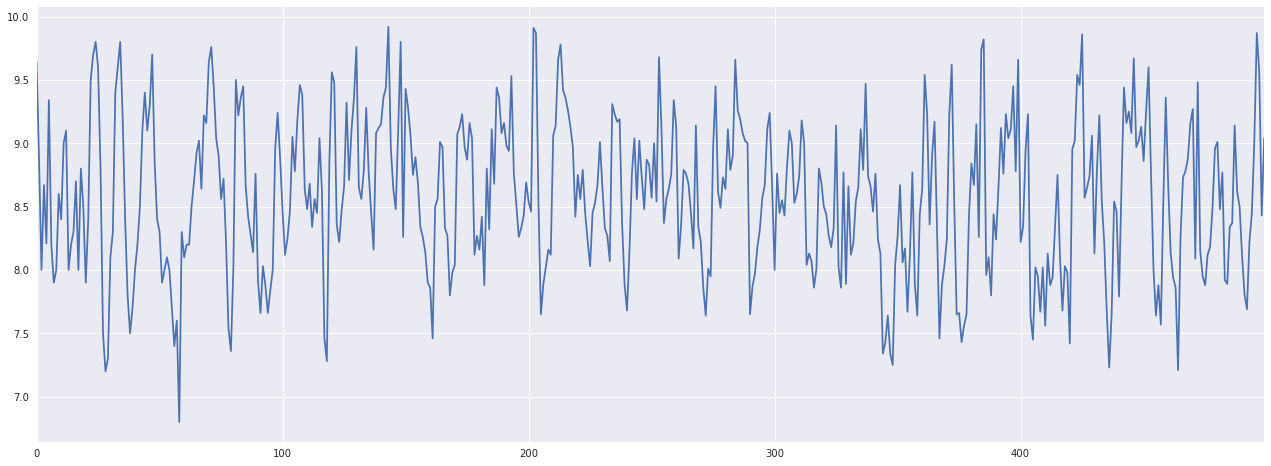

In [28]:
plt.figure(figsize=(22,8))
ab['CGPA'].plot()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


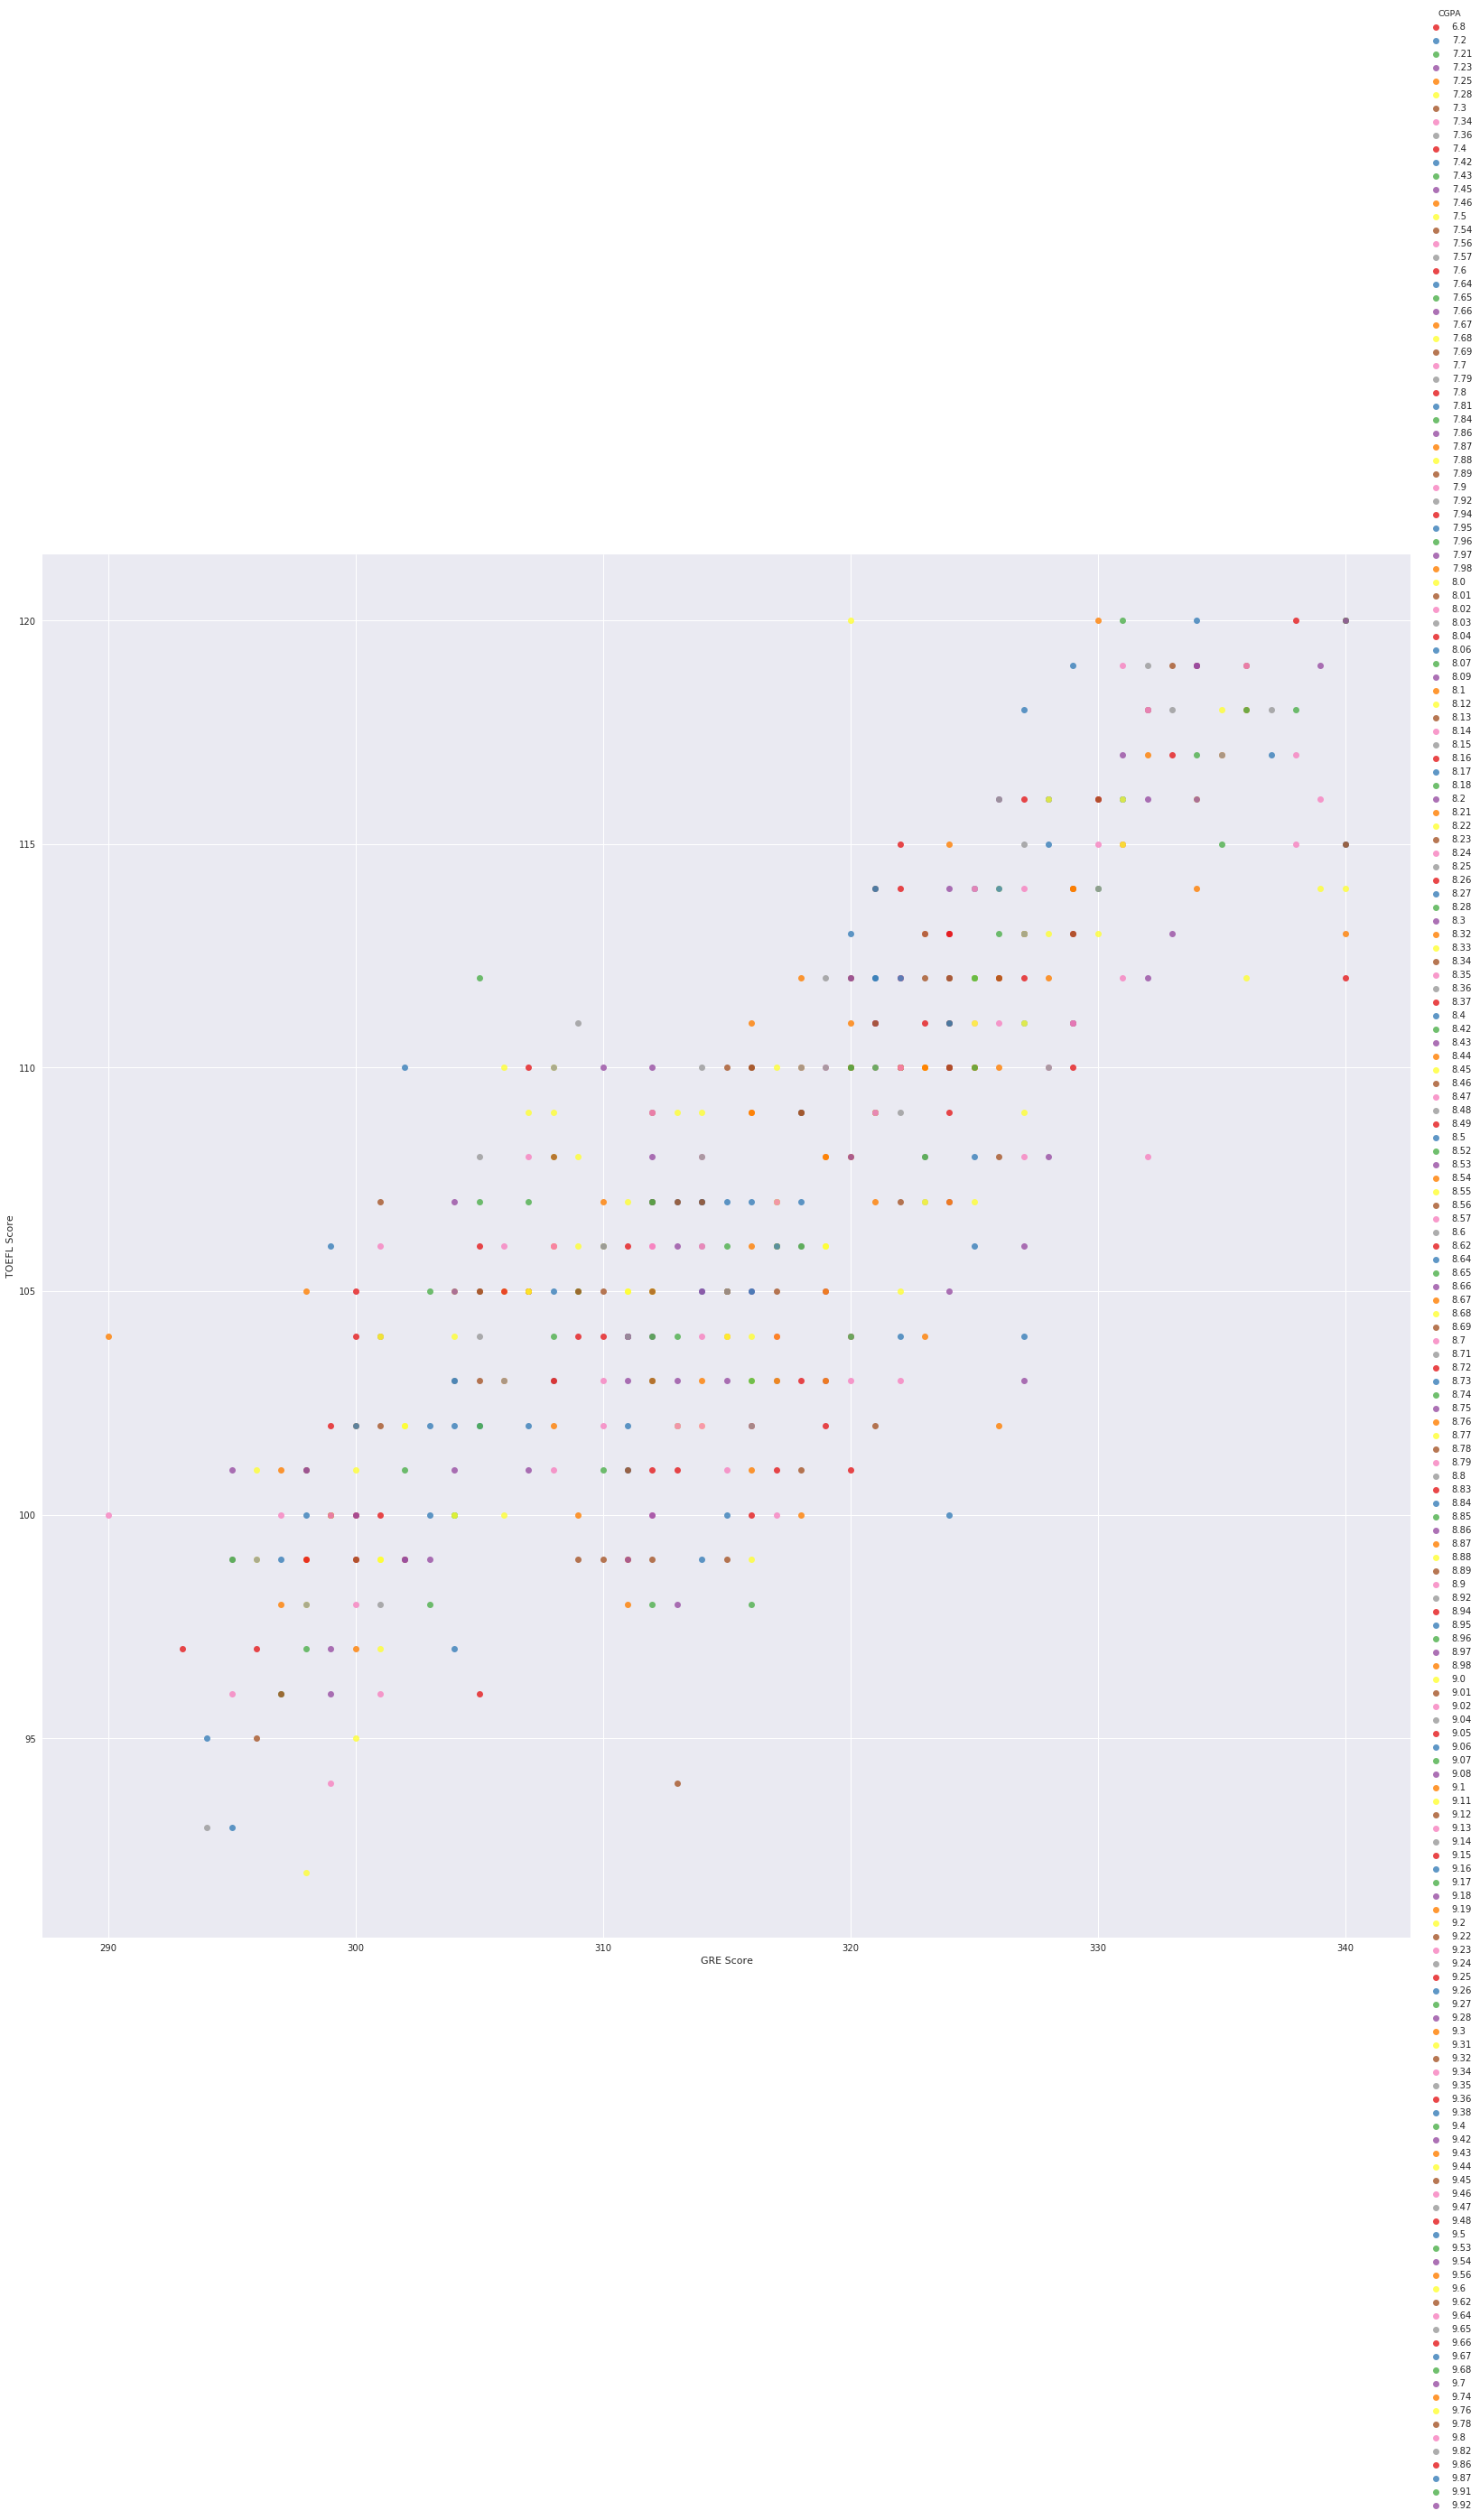

In [29]:
sns.lmplot('GRE Score','TOEFL Score', data=ab,hue='CGPA',palette='Set1',size=22,aspect=1,fit_reg=False)

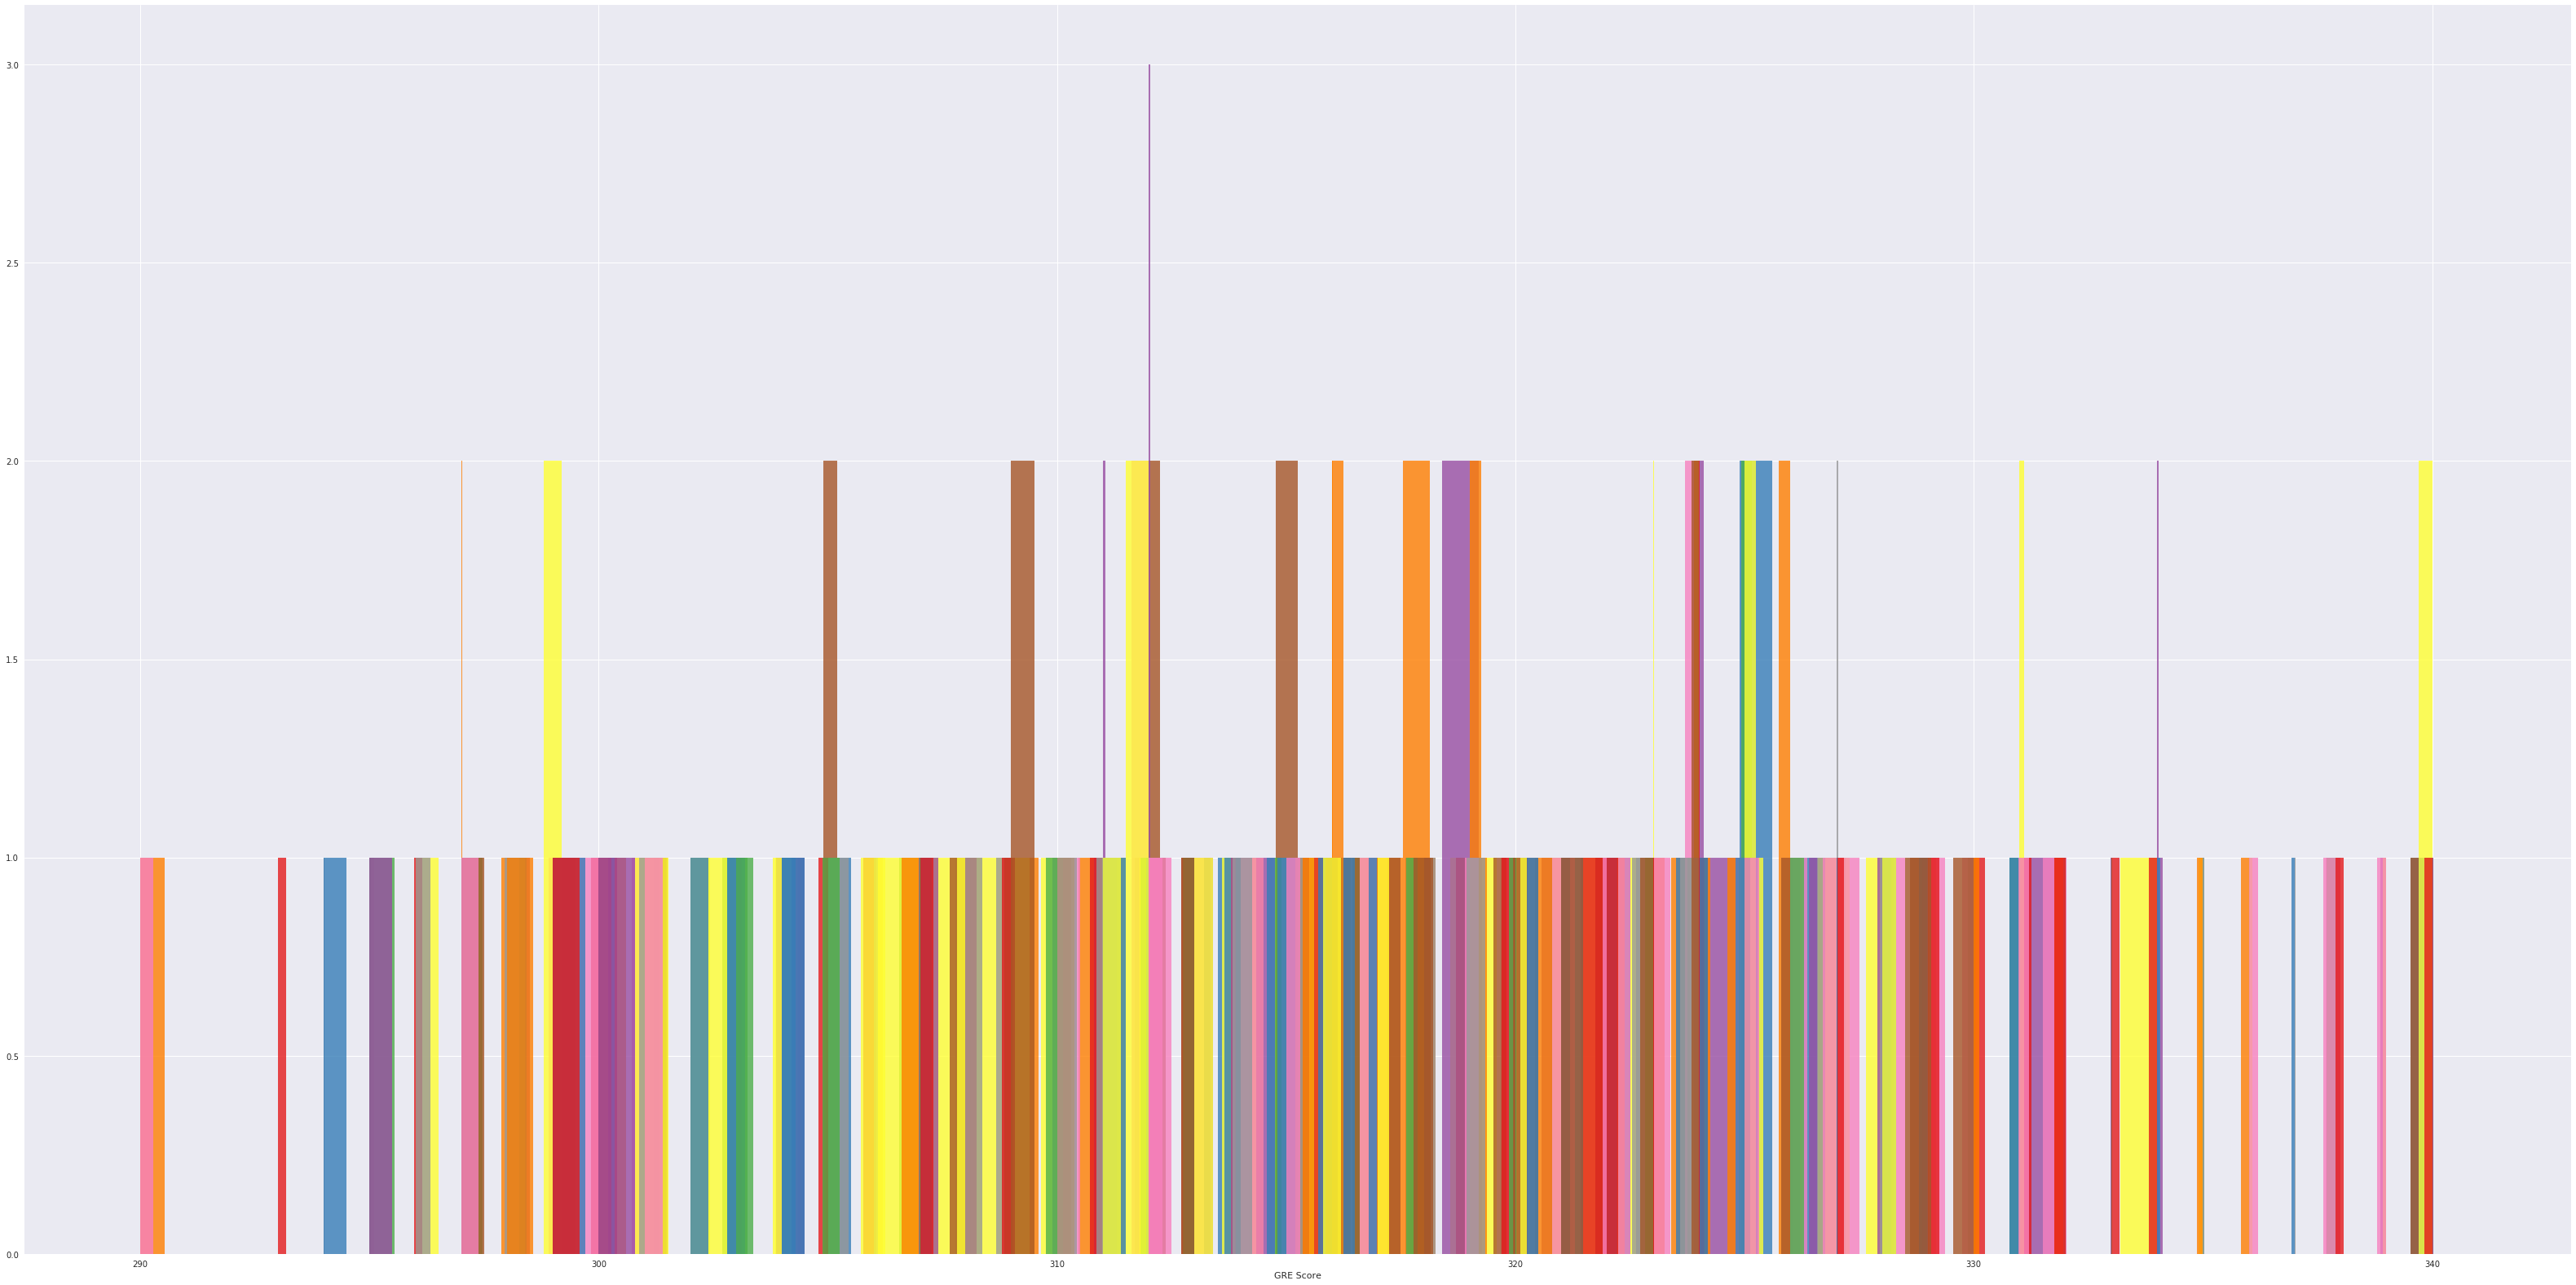

In [30]:
a=sns.FacetGrid(ab,hue='CGPA',palette='Set1',size=22,aspect=2)
a=a.map(plt.hist,'GRE Score',bins=40,alpha=0.8)

In [31]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)

In [32]:
kmeans.fit(ab.drop('GRE Score',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
centers=kmeans.cluster_centers_
centers

array([[349.        , 105.76237624,   2.76237624,   3.05940594,
          3.1980198 ,   8.45564356,   0.52475248,   0.70346535],
       [148.        , 108.95959596,   3.37373737,   3.54040404,
          3.61616162,   8.74141414,   0.56565657,   0.7640404 ],
       [ 49.5       , 107.59183673,   3.19387755,   3.52040816,
          3.41836735,   8.5122449 ,   0.59183673,   0.67918367],
       [450.        , 106.42574257,   3.22772277,   3.28712871,
          3.61386139,   8.49811881,   0.61386139,   0.71366337],
       [248.        , 107.26732673,   3.01980198,   3.47029703,
          3.57425743,   8.67613861,   0.5049505 ,   0.74792079]])

In [34]:
ab['klabels']=kmeans.labels_
ab.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,klabels
0,1,337,118,4,4.5,4.5,9.65,1,0.92,2
1,2,324,107,4,4.0,4.5,8.87,1,0.76,2
2,3,316,104,3,3.0,3.5,8.00,1,0.72,2
3,4,322,110,3,3.5,2.5,8.67,1,0.80,2
4,5,314,103,2,2.0,3.0,8.21,0,0.65,2


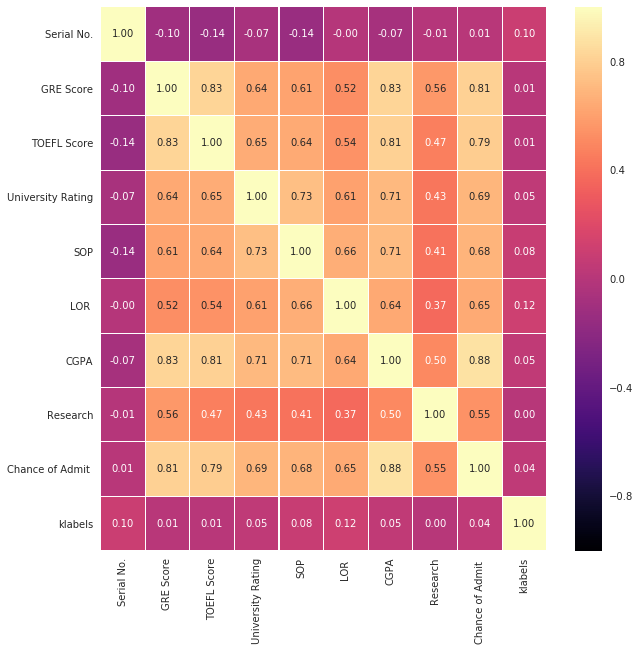

In [35]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(ab.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [36]:
ab = pd.read_csv("Admission_Predict_Ver1.1.csv",sep = ",")
ab=ab.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})
serial = ab["Serial No."]
ab.drop(["Serial No."],axis=1,inplace = True)
ab = (ab- np.min(ab))/(np.max(ab)-np.min(ab))
y = ab.ChanceOfAdmit 
x = ab.drop(["ChanceOfAdmit"],axis=1)

data:
          x         y
0 -1.387124  0.920635
1 -0.925340  0.666667
2 -0.324205  0.603175
3 -0.524965  0.730159
4  1.162969  0.492063

df:
   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  
0       1.0       0.920635  
1       1.0       0.666667  
2       1.0       0.603175  
3       1.0       0.730159  
4       0.0       0.492063  


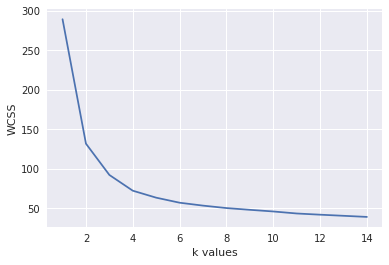

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten= True )  
pca.fit(x)
x_pca = pca.transform(x)
x_pca = x_pca.reshape(500,)
dictionary = {"x":x_pca,"y":y}
data = pd.DataFrame(dictionary)
print("data:")
print(data.head())
print("\ndf:")
print(ab.head())
ab["Serial No."] = serial
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(x)

ab["label_kmeans"] = clusters_knn

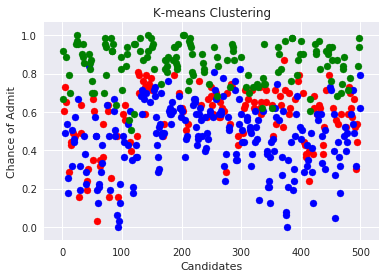

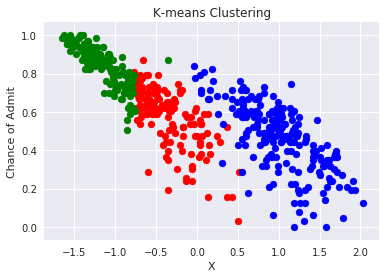

In [38]:
plt.scatter(ab[ab.label_kmeans == 0 ]["Serial No."],ab[ab.label_kmeans == 0].ChanceOfAdmit,color = "red")
plt.scatter(ab[ab.label_kmeans == 1 ]["Serial No."],ab[ab.label_kmeans == 1].ChanceOfAdmit,color = "blue")
plt.scatter(ab[ab.label_kmeans == 2 ]["Serial No."],ab[ab.label_kmeans == 2].ChanceOfAdmit,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

ab["label_kmeans"] = clusters_knn
plt.scatter(data.x[ab.label_kmeans == 0 ],data[ab.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[ab.label_kmeans == 1 ],data[ab.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[ab.label_kmeans == 2 ],data[ab.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

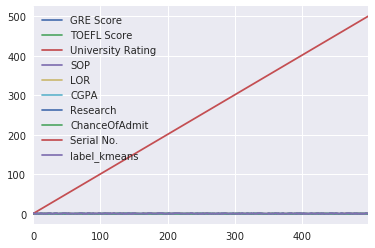

In [39]:
ab.plot();

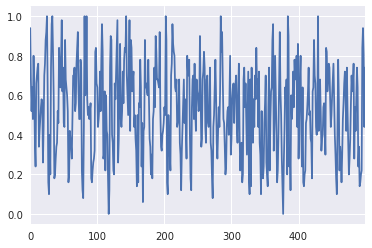

In [40]:
ab['GRE Score'].plot();

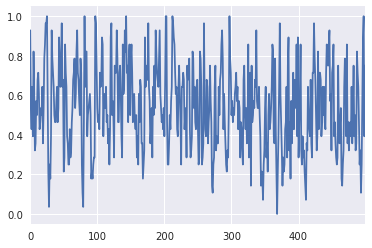

In [41]:
ab['TOEFL Score'].plot();

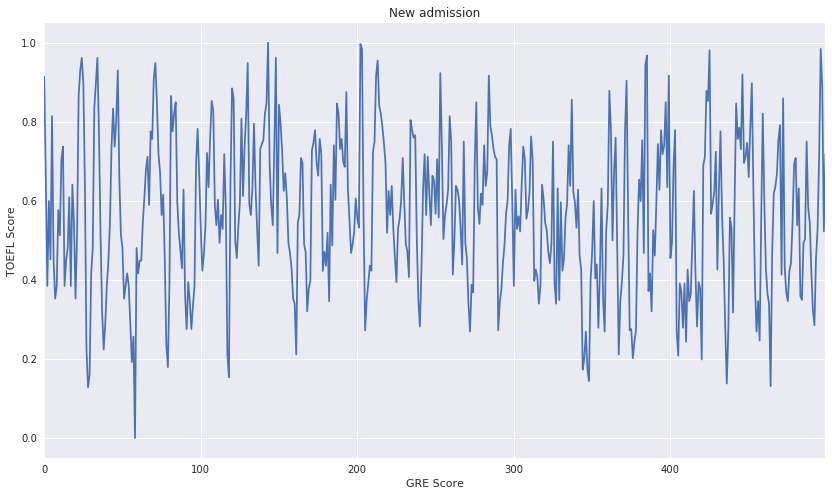

In [42]:
title='New admission'
xlabel='GRE Score'
ylabel='TOEFL Score'
ad=ab['CGPA'].plot(figsize=(14,8),title=title)
ad.autoscale(axis='X',tight=True)
ad.set(xlabel=xlabel,ylabel=ylabel);

In [43]:
ab.rolling(window=7).mean().head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,Serial No.,label_kmeans
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.668571,0.622449,0.607143,0.625000,0.642857,0.610806,0.857143,0.707483,4.0,1.000000
7,0.585714,0.535714,0.535714,0.571429,0.625000,0.530678,0.714286,0.653061,5.0,0.857143
8,0.522857,0.510204,0.428571,0.500000,0.517857,0.490842,0.571429,0.594104,6.0,0.714286
9,0.542857,0.530612,0.428571,0.517857,0.500000,0.518315,0.428571,0.532880,7.0,0.857143


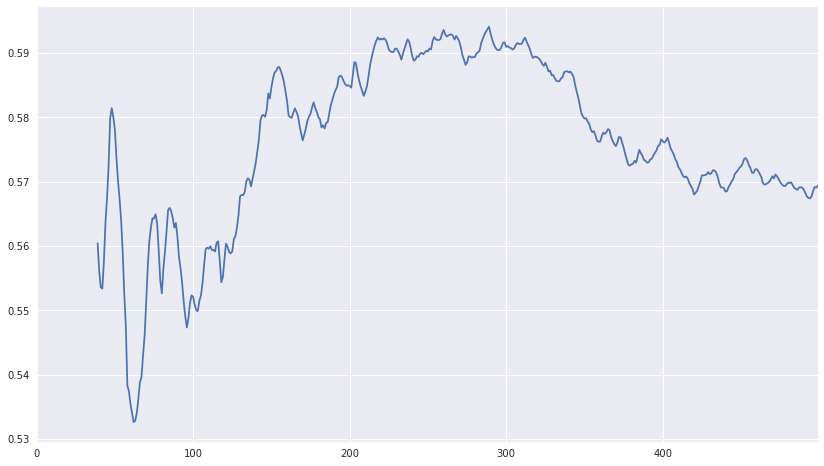

In [44]:
ab['CGPA'].expanding(min_periods=40).mean().plot(figsize=(14,8));

Done